<a href="https://colab.research.google.com/github/Marcg20/ProrectoIA-ML/blob/main/Proyecto_IA_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Proyecto inteligencia artificial**

*   Método supervizado - Clasificación







Limpieza de datos




In [ ]:
#Librerias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt
from sklearn import decomposition, svm
from sklearn.neighbors import KNeighborsClassifier, DistanceMetric
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, matthews_corrcoef, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier


In [ ]:
df = pd.read_csv("water_potability.csv", sep=',',header=0)
df.head(-5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3266,8.372910,169.087052,14622.745494,7.547984,NaN,464.525552,11.083027,38.435151,4.906358,1
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1


In [ ]:
df.isnull().sum() #Buscar cuántos tiene valores nulos (ph, Sulfate,Trihalomethanes)

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
col_ph = df["ph"].fillna(df["ph"].mean())
df["ph"]= col_ph #Rellenar con la media columna ph

col_Sulfate = df["Sulfate"].fillna(df["Sulfate"].mean())
df["Sulfate"]= col_Sulfate #Rellenar con la media columna Sulfate

col_Trihalomethanes = df["Trihalomethanes"].fillna(df["Trihalomethanes"].mean())
df["Trihalomethanes"]= col_Trihalomethanes #Rellenar con la media columna Trihalomethanes


In [ ]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
df.head(-5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3266,8.372910,169.087052,14622.745494,7.547984,333.775777,464.525552,11.083027,38.435151,4.906358,1
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1


Se va a tomar un 10% del conjunto de datos para evaluar el desempeño final del modelo y el restante 90% para realizar una validación cruzada

In [ ]:
train, test = train_test_split(df,test_size=0.1)

X_train = train[['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']].values
y_train = train['Potability'].values

X_test = test[['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']].values
y_test = test['Potability'].values


Normalización

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


PCA

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if sys.path[0] == '':


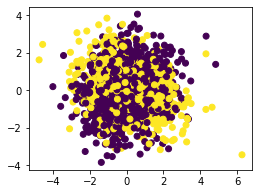

Pesos de PCA: [0.13452183 0.12596891 0.11662952 0.11348391 0.11048641 0.10782924
 0.10466738 0.09846403 0.08794876]
Varianza explicada total: 1.0


In [ ]:
#Preparar figura 2D
fig = plt.figure(2, figsize=(4, 3))

pca = decomposition.PCA(n_components=9)

#The optional parameter whiten=True makes it possible to project the data onto the singular space while scaling each component to unit variance.
pca.fit(X_train)
X = pca.transform(X_train)

# Reorder the labels to have colors matching the cluster results

Y = np.choose(y_train, [1, 2, 0]).astype(np.float)
plt.scatter(X[:, 0], X[:, 1], c=Y,)

plt.show()
print("Pesos de PCA:",pca.explained_variance_ratio_)
print("Varianza explicada total:",sum(pca.explained_variance_ratio_))

KNN

In [ ]:
parameters = {'weights':["distance","uniform"], 
              'n_neighbors':range(1, 30),
              'algorithm':["auto", "ball_tree", "kd_tree", "brute"],
              'metric':["manhattan","euclidean","minkowski","chebyshev"]}
knn = KNeighborsClassifier()
knn_GS = GridSearchCV(knn,parameters,cv=5).fit(X_train, y_train)


In [ ]:
print(knn_GS.best_params_)
#print(sorted(knn_GS.cv_results_.keys()))

{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 24, 'weights': 'distance'}


Evaluación métricas con KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 24,weights='distance',metric='manhattan', metric_params=None,algorithm='auto').fit(X_train, y_train)
Y_pred_train = knn.predict(X_train)
Y_pred_test = knn.predict(X_test)

print("MCC de train:",matthews_corrcoef(y_train,Y_pred_train))
print("MCC de test:",matthews_corrcoef(y_test,Y_pred_test))
print("f1_score de train",f1_score(y_train, Y_pred_train))
print("f1_score de test",f1_score(y_test, Y_pred_test))


MCC de train: 1.0
MCC de test: 0.22910308976134525
f1_score de train 1.0
f1_score de test 0.367816091954023


SVM

In [ ]:
parameters = {'kernel':('linear', 'poly', 'rbf', 'sigmoid'), 
              'C':[0.1,1,5,10,100]}
svc = svm.SVC()
svc_GS = GridSearchCV(svc,parameters,cv=5).fit(X_train, y_train)

In [ ]:
print(svc_GS.best_params_)
#print(sorted(knn_GS.cv_results_.keys()))

{'C': 1, 'kernel': 'rbf'}


Evaluación métricas con SVM

In [ ]:
svc = svm.SVC(kernel ='rbf', C = 1).fit(X_train, y_train)
Y_pred_train = svc.predict(X_train)
Y_pred_test = svc.predict(X_test)


print("MCC de train:",matthews_corrcoef(y_train,Y_pred_train))
print("MCC de test:",matthews_corrcoef(y_test,Y_pred_test))
print("f1_score de train",f1_score(y_train, Y_pred_train))
print("f1_score de test",f1_score(y_test, Y_pred_test))

MCC de train: 0.430873119024655
MCC de test: 0.2640939749402948
f1_score de train 0.5236668663870582
f1_score de test 0.39772727272727276


Decision Tree

In [ ]:
parameters = {'criterion': ['gini','entropy','log_loss'],
              'max_depth': range(1,30),
              'min_samples_split': range(1,10),
              'min_samples_leaf': range(1,10)}
              
DTC= DecisionTreeClassifier()
DTC_GS = GridSearchCV(DTC,parameters,cv=5).fit(X_train, y_train)

In [ ]:
print(DTC_GS.best_params_)
#print(sorted(knn_GS.cv_results_.keys()))

{'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 9, 'min_samples_split': 6}


Evaluación métricas con Decision Tree

In [ ]:
DTC = DecisionTreeClassifier(criterion='entropy',max_depth=9, min_samples_leaf= 9, min_samples_split= 6).fit(X_train, y_train)
Y_pred_train = DTC.predict(X_train)
Y_pred_test = DTC.predict(X_test)

print("MCC de train:",matthews_corrcoef(y_train,Y_pred_train))
print("MCC de test:",matthews_corrcoef(y_test,Y_pred_test))
print("f1_score de train",f1_score(y_train, Y_pred_train))
print("f1_score de test",f1_score(y_test, Y_pred_test))

MCC de train: 0.43827758622107965
MCC de test: 0.15465602413224086
f1_score de train 0.6143790849673203
f1_score de test 0.4205607476635514


Multi-layer Perceptron classifier

In [ ]:
parameters = {'hidden_layer_sizes': [(2,2),(3,3),(4,4),(5,5)],
              'activation': [ 'identity', 'logistic', 'tanh', 'relu']}
              
MLP = MLPClassifier()
MLP_GS = GridSearchCV(MLP,parameters,cv=5).fit(X_train, y_train)

In [ ]:
print(MLP_GS.best_params_)
#print(sorted(knn_GS.cv_results_.keys()))

{'activation': 'tanh', 'hidden_layer_sizes': (5, 5)}


Evaluación métricas con MLP

In [ ]:
MLP = MLPClassifier(hidden_layer_sizes=(5,5),activation='tanh', max_iter=350).fit(X_train, y_train)
Y_pred_train = MLP.predict(X_train)
Y_pred_test = MLP.predict(X_test)

print("MCC de train:",matthews_corrcoef(y_train,Y_pred_train))
print("MCC de test:",matthews_corrcoef(y_test,Y_pred_test))
print("f1_score de train",f1_score(y_train, Y_pred_train))
print("f1_score de test",f1_score(y_test, Y_pred_test))

MCC de train: 0.32792257262825686
MCC de test: 0.30763132232108775
f1_score de train 0.5388127853881279
f1_score de test 0.5339366515837104
